In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

import pickle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

from sklearn.model_selection import train_test_split

In [ ]:
(train_data, test_data), ds_info = tfds.load(name="caltech101",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
class_names = ds_info.features["label"].names

In [ ]:
train_data,test_data = test_data, train_data

In [ ]:
tfds.show_examples(train_data, ds_info)

In [ ]:
tfds.show_examples(test_data, ds_info)

In [ ]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(tf.image.resize(image, (224,224)), tf.float32) / 255., tf.one_hot(label, depth=len(class_names))


In [ ]:
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

In [ ]:
for images, labels in mapped_train_data.take(1):  # Take one batch
    # Select the first image from the batch
    image = images[0]

    # Reshape the image tensor if necessary (remove the batch dimension)
    image = tf.squeeze(image)
    print(image.shape)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
for images, labels in mapped_test_data.take(1):  # Take one batch
    # Select the first image from the batch
    image = images[0]

    # Reshape the image tensor if necessary (remove the batch dimension)
    image = tf.squeeze(image)
    print(image.shape)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
model = Sequential()

#Block 1
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 4
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 5
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))


#Output
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(102, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 111, 111, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 55, 55, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 55, 55, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 27, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 27, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 107,421,350 (409.78 MB)

 Trainable params: 107,418,406 (409.77 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_vgg = model.fit(mapped_train_data,epochs=30, batch_size=32, validation_data=mapped_test_data)

Epoch 1/30


I0000 00:00:1711009350.792824     384 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711009350.816966     384 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.1817 - loss: 10.8067

W0000 00:00:1711009405.393849     384 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


191/191 ━━━━━━━━━━━━━━━━━━━━ 110s 363ms/step - accuracy: 0.1820 - loss: 10.7793 - val_accuracy: 0.0098 - val_loss: 47.6468
Epoch 2/30


W0000 00:00:1711009419.889347     383 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.3095 - loss: 3.2962 - val_accuracy: 0.0631 - val_loss: 1861.0752
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.3477 - loss: 3.5565 - val_accuracy: 0.0670 - val_loss: 394.3009
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.3713 - loss: 3.1446 - val_accuracy: 0.0356 - val_loss: 3882.1328
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.2606 - loss: 20.7775 - val_accuracy: 0.0513 - val_loss: 3079.0784
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.3445 - loss: 3.4500 - val_accuracy: 0.0477 - val_loss: 11493.5703
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.2366 - loss: 6.4601 - val_accuracy: 0.0180 - val_loss: 2781.0801
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.2440 - loss: 4.4868 - val_accuracy: 0.0186 - val_loss: 143.6582
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 252ms/step - accuracy: 0.2779

In [ ]:
with open('history_VGG.pkl', 'wb') as f:
    pickle.dump(history_vgg, f)

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the history file in Google Drive
save_path = '/content/drive/My Drive/history_vgg.pkl'

# Serialize and save the history object to a file
with open(save_path, 'wb') as file:
    pickle.dump(history_VGG.history, file)

In [ ]:
with open('history_VGG.pkl', 'rb') as f:
    history_vgg = pickle.load(f)

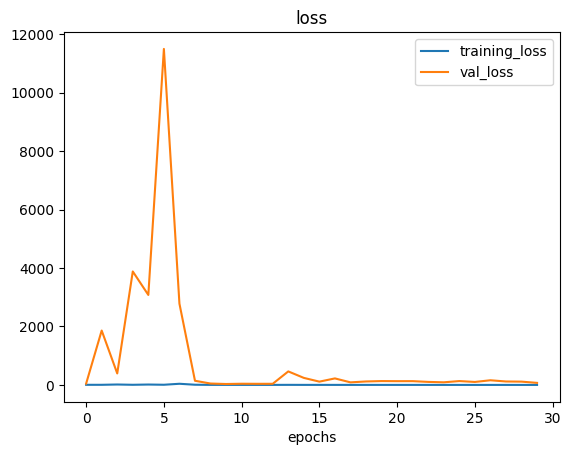

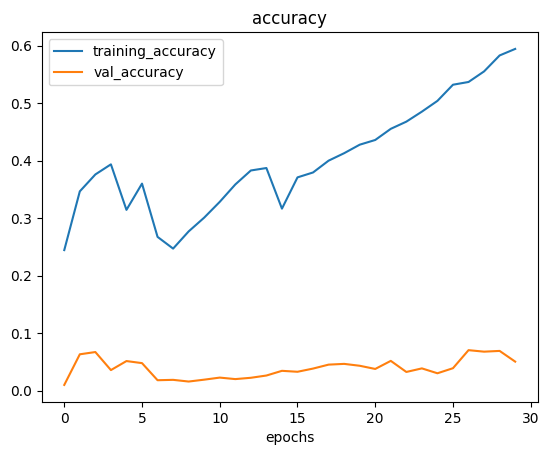

In [ ]:
plot_loss_curves(history_vgg)